    Relaxation Factor    rho
0               0.100  0.900
1               0.155  0.845
2               0.210  0.790
3               0.265  0.735
4               0.320  0.680
5               0.375  0.625
6               0.430  0.570
7               0.485  0.515
8               0.540  0.460
9               0.595  0.405
10              0.650  0.350
11              0.705  0.295
12              0.760  0.240
13              0.815  0.185
14              0.870  0.130
15              0.925  0.075
16              0.980  0.020
17              1.035  0.035
18              1.090  0.090
19              1.145  0.145
20              1.200  0.200
0.020000000000000125


<ipython-input-198-92cc02681ef7>:54: RuntimeWarning: invalid value encountered in sqrt
  rho_l = 0.25*np.power(w*eig_c +np.sqrt(np.power(w,2)*np.power(eig_c,2)-4*(w-1)),2)


Text(0, 0.5, 'Spectral Radius')

<Figure size 432x288 with 0 Axes>

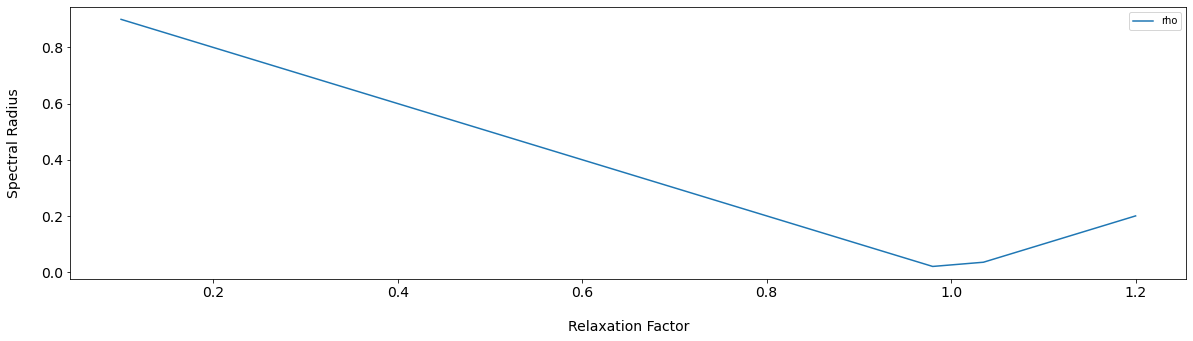

In [198]:
# Converting MATLAB SOR Function to Python for Successive Over Relaxation
import time
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows',None)

#Defining A and b
n=200
convergence = 0.1
A = np.ones((n,n)) #Defining Dimensions of A Array
# A = np.random.rand(n,n)


b = np.zeros((n)) #Defining Dimensions of b vector
itera_eval = []

for i in range(n):
     A[i,i] = n   #Add diagonal n
     b[i] = 2*n - 1 #Add b variable to b vector
    
resolution = 21
omega_vec = np.linspace(0.1,1.2,resolution)
U = np.triu(A,1)
L = np.tril(A,-1)
D = np.diag(np.diag(A))


w=1.2


# print(C)


spectral_data = []
rho = 5

for k in range(resolution):
    w = omega_vec[k]
    M = D + w*L
    N = (1-w)*D - w*U
    v = (np.linalg.inv(M)*N)
    eig_vmax = np.amax(np.absolute(np.linalg.eigvals(v)))
    C = np.identity(n) - np.linalg.inv(D)*A
    eig_c = np.amax(np.linalg.eigvals(C))
#     mu_c = (eig_c + w - 1)/(w * np.sqrt(eig_c))
#     mu_c = (eig_c)/(np.sqrt(eig_c))

    mu_v = (eig_vmax + w - 1)/(w * np.sqrt(eig_vmax))
    
#     print (mu_v)
    rho_l = 0.25*np.power(w*eig_c +np.sqrt(np.power(w,2)*np.power(eig_c,2)-4*(w-1)),2)
    rho_u = w - 1
        
    if rho > rho_l :
        rho = rho_l
    else:
        rho = rho_u
        
#     print(M)
#     print(np.linalg.inv(M))
#     print(np.linalg.inv(M)*N)
    
    
    spectral_data.append([w,rho])

df_spectral = pd.DataFrame(spectral_data,columns = ['Relaxation Factor','rho'])
print(df_spectral)

minval = df_spectral['rho'].min()
# maxval = df_spectral['max'].max()
# # omega = 2./(minval*np.linalg.inv(D)*A + maxval*np.linalg.inv(D)*A)
# omega = 1 + np.power(maxval/(1+np.sqrt(1-np.power(maxval,2))),2)
print(minval)
# print(maxval)
# print(omega)

#Plotting
plt.figure()
df_spectral.plot(x = "Relaxation Factor", y= ["rho"],kind="line",figsize=(20, 5),fontsize=14)
plt.xlabel("Relaxation Factor", labelpad=20,fontsize=14)
plt.ylabel("Spectral Radius", labelpad=20,fontsize=14)
    